<a href="https://colab.research.google.com/github/SnehalT317/DecisionTree/blob/main/Danfoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from autogluon.tabular import TabularDataset, TabularPredictor

# New Section

In [81]:
#!pip install autogluon

In [82]:
df_Sheet3 = pd.read_excel("EMEA_Rawdata_EXT-1.xlsx",sheet_name='Sheet3')
#df_Sheet1 = pd.read_excel("EMEA_Rawdata_EXT-1.xlsx",sheet_name='Sheet1')
#df_Sheet2 = pd.read_excel("EMEA_Rawdata_EXT-1.xlsx",sheet_name='Sheet2')

In [83]:
#df_Sheet1

In [84]:
#df_Sheet2

In [85]:
df_Sheet3

,Year,Month,TARGET VARIABLE,"EMEA, Business Confidence Indicator (BCI)","EMEA, CLI Normalized","EMEA, Consumer Confidence Indicator (CCI)","EMEA, Crude oil prices","EMEA, Employment Rate","EMEA, GDP Normalized","EMEA, Germany ifo Business Climate",...,"EMEA, Production of total construction Index","EMEA, Production of total industry Index","EMEA, Production of total manufactured intermediate goods Index","EMEA, Production of total manufactured investment goods Index","EMEA, Residential Property Sales of Newly Built Dwelings","EMEA, VDMA Agriculture","EMEA, VDMA Construction","EMEA, VDMA Machine Building","EMEA, VDMA Material Handling","EMEA, VDMA Oil Hydraulic"
0,2008,3,56.470288,99.386446,99.557885,98.749106,168.633416,101.237421,101.316538,95.536268,...,100.982924,102.760351,102.130085,105.519810,103.477218,152.230259,78.222050,101.729730,109.491247,99.525480
1,2008,4,58.276205,99.252286,99.302441,98.489578,170.615133,101.084697,101.189693,95.020105,...,99.455811,103.044570,102.162637,105.808424,103.040339,147.498286,79.617964,108.737317,130.367913,96.626406
2,2008,5,56.868989,99.107791,99.027786,98.153161,182.792208,100.932420,101.021160,95.629424,...,97.941626,101.939318,100.863572,104.296346,102.608352,139.180835,74.803818,102.905501,109.939324,87.821297
3,2008,6,56.320007,98.953695,98.723806,97.763344,190.765916,100.780587,100.801965,94.756323,...,97.617816,101.186758,99.971225,103.435500,102.181175,137.021093,74.743418,102.995057,102.128778,88.591610
4,2008,7,52.344385,98.797412,98.384961,97.426953,191.471205,100.645817,100.524887,93.881988,...,97.589115,99.193298,98.533633,100.565160,101.651005,126.194468,66.202091,91.503987,85.019864,79.475532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,2022,3,59.446688,102.819237,100.971850,100.202020,163.470636,NaN,105.014124,102.037898,...,104.354492,102.510597,NaN,NaN,NaN,92.703863,94.255319,107.462687,109.973046,93.305439
169,2022,4,56.667345,101.544528,100.501505,98.261451,164.929531,NaN,104.825643,98.321678,...,103.595369,102.315721,NaN,NaN,NaN,92.216981,88.744589,100.285714,98.518519,87.896825
170,2022,5,58.218333,100.162655,99.933311,96.287703,169.052275,NaN,104.311251,94.192005,...,102.077687,101.424870,NaN,NaN,NaN,82.216495,85.393258,99.421965,118.766756,85.714286
171,2022,6,57.102472,99.161020,99.368351,94.935876,164.507994,NaN,103.729522,93.051360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df_Sheet3=df_Sheet3.sort_values(by='Year')

In [87]:
df_Sheet3.tail()

,Year,Month,TARGET VARIABLE,"EMEA, Business Confidence Indicator (BCI)","EMEA, CLI Normalized","EMEA, Consumer Confidence Indicator (CCI)","EMEA, Crude oil prices","EMEA, Employment Rate","EMEA, GDP Normalized","EMEA, Germany ifo Business Climate",...,"EMEA, Production of total construction Index","EMEA, Production of total industry Index","EMEA, Production of total manufactured intermediate goods Index","EMEA, Production of total manufactured investment goods Index","EMEA, Residential Property Sales of Newly Built Dwelings","EMEA, VDMA Agriculture","EMEA, VDMA Construction","EMEA, VDMA Machine Building","EMEA, VDMA Material Handling","EMEA, VDMA Oil Hydraulic"
171,2022,6,57.102472,99.161020,99.368351,94.935876,164.507994,NaN,103.729522,93.051360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,2022,2,60.138570,103.769179,101.208054,101.621622,155.991396,NaN,103.807195,105.196221,...,103.964076,103.330069,NaN,NaN,NaN,94.357977,89.318182,116.346154,110.649351,99.019608
166,2022,1,66.056626,104.318714,101.411290,102.368866,167.705059,NaN,103.486750,105.193855,...,101.563458,102.804958,NaN,NaN,NaN,96.132597,103.174603,120.779221,130.874317,105.684755
168,2022,3,59.446688,102.819237,100.971850,100.202020,163.470636,NaN,105.014124,102.037898,...,104.354492,102.510597,NaN,NaN,NaN,92.703863,94.255319,107.462687,109.973046,93.305439
172,2022,7,56.942840,98.425956,98.938640,93.944354,NaN,NaN,103.154246,90.665343,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_Sheet3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 24 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Year                                                             173 non-null    int64  
 1   Month                                                            173 non-null    int64  
 2   TARGET VARIABLE                                                  173 non-null    float64
 3   EMEA, Business Confidence Indicator (BCI)                        173 non-null    float64
 4   EMEA, CLI Normalized                                             173 non-null    float64
 5   EMEA, Consumer Confidence Indicator (CCI)                        173 non-null    float64
 6   EMEA, Crude oil prices                                           172 non-null    float64
 7   EMEA, Employment Rate                       

In [89]:
#Checking for duplicate records in the data
df_Sheet3.duplicated().sum()

0

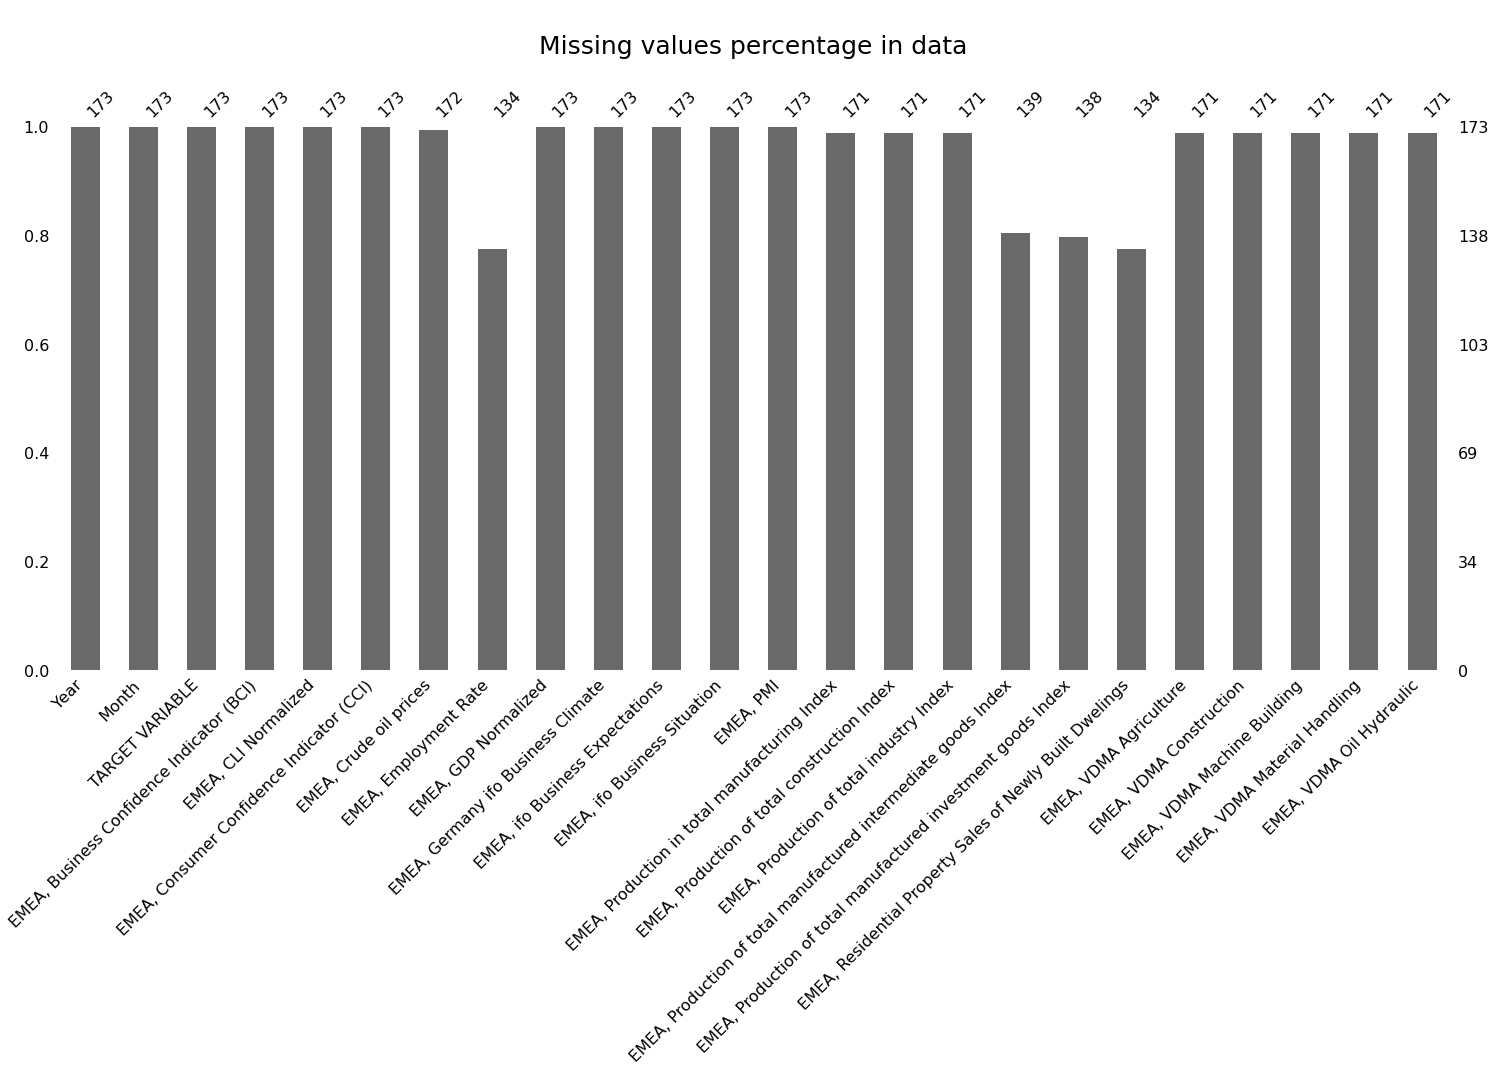

In [90]:
#Missing value checks
msno.bar(df_Sheet3)

plt.title("\nMissing values percentage in data\n",fontsize=25)
plt.show()

The data has four columns which have more missing values than others but since we have timeseries data and sales forecasting is the goal I need to check how important the columns are. Below shows the missing percentage of the data in those 4 columns:<br>
    1. EMEA, Employment Rate - ~21% <br>
    2. EMEA, Production of total manufactured intermediate goods Index - ~21% <br>
    3. EMEA, Production of total manufactured investment goods Index - ~21% <br>
    4. EMEA, Residential Property Sales of Newly Built Dwelings - ~22%

In [91]:
df_Sheet3['Year'].value_counts()

2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017    12
2018    12
2019    12
2020    12
2021    12
2008    10
2022     7
Name: Year, dtype: int64

In [92]:
df_Sheet3['Month'].value_counts()

3     15
4     15
5     15
6     15
7     15
8     14
9     14
10    14
11    14
12    14
2     14
1     14
Name: Month, dtype: int64

In [93]:
df_Sheet3["period"] = df_Sheet3["Year"].apply(str) + "-" +df_Sheet3["Month"].apply(str)
print(df_Sheet3["period"])

0      2008-3
1      2008-4
2      2008-5
3      2008-6
4      2008-7
        ...  
171    2022-6
167    2022-2
166    2022-1
168    2022-3
172    2022-7
Name: period, Length: 173, dtype: object


In [94]:
df_Sheet3['period']=pd.to_datetime(df_Sheet3['period'])

In [95]:
df_Sheet3['period'].head()

0   2008-03-01
1   2008-04-01
2   2008-05-01
3   2008-06-01
4   2008-07-01
Name: period, dtype: datetime64[ns]

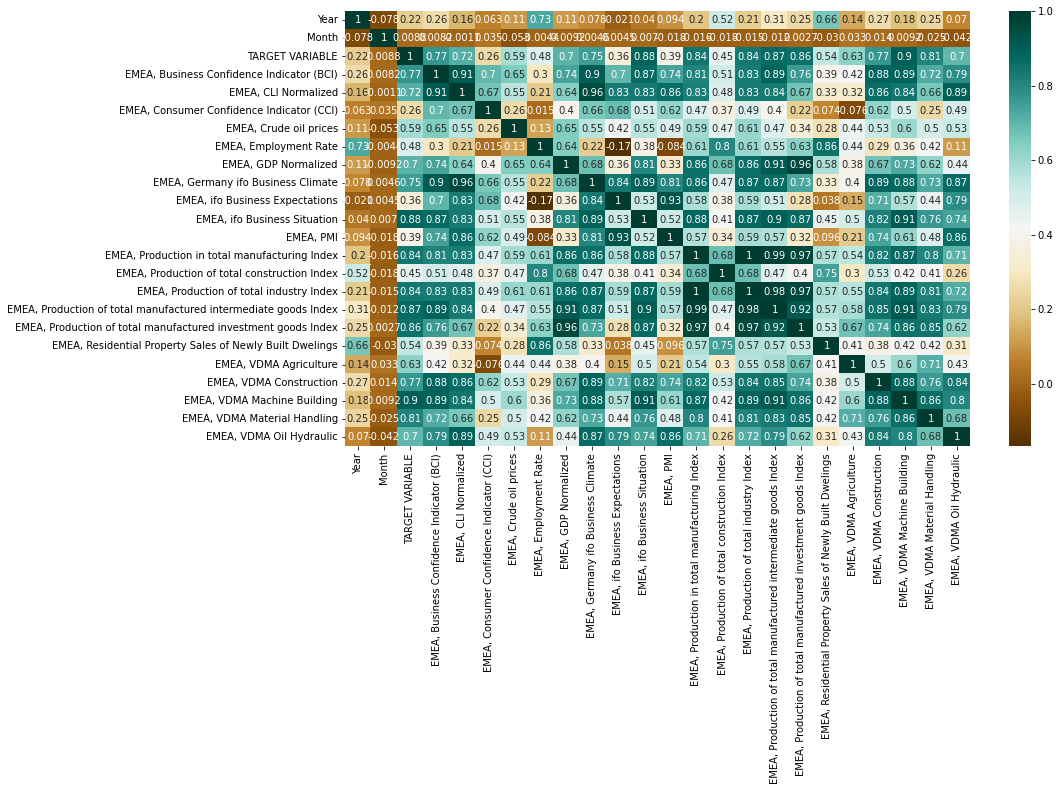

In [96]:
df_Sheet3.corr()
plt.figure(figsize=(14,8))
hm = sns.heatmap(df_Sheet3.corr(), annot = True,cmap='BrBG')

plt.show()

<Figure size 8640x1440 with 0 Axes>

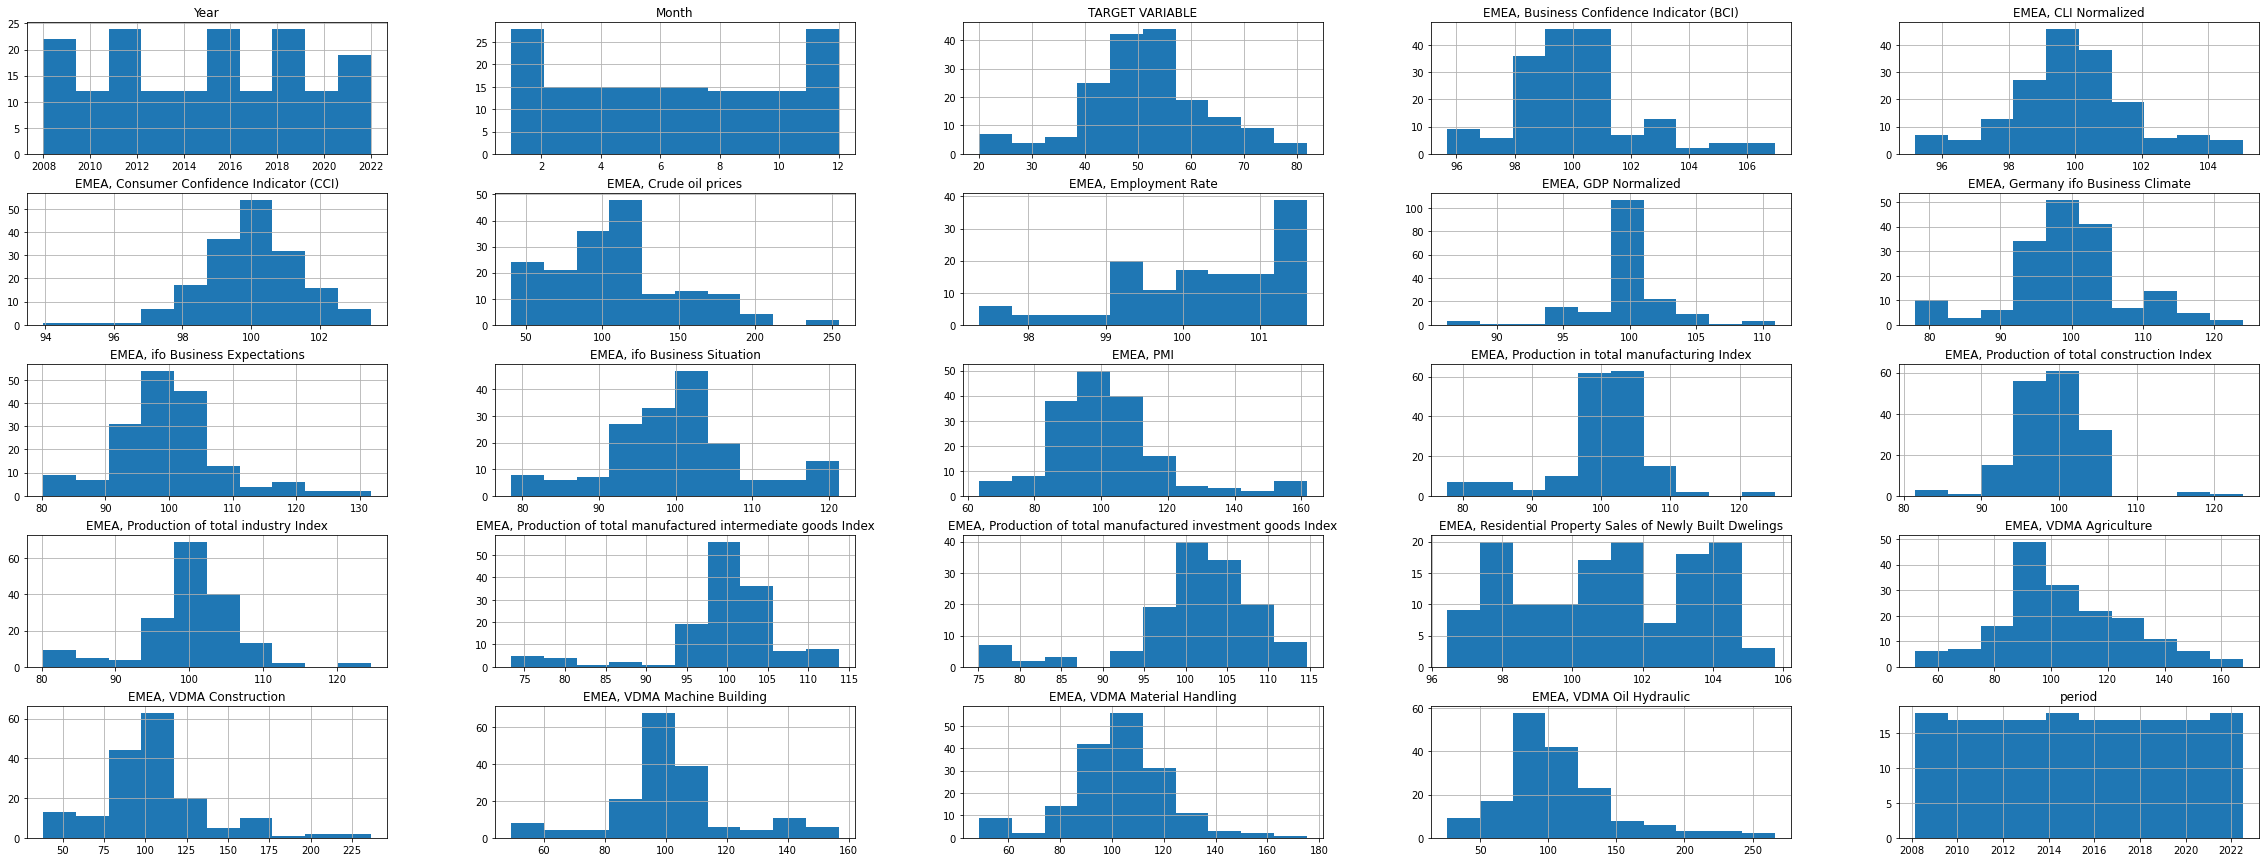

In [97]:
plt.figure(figsize=(120,20))
df_Sheet3.hist(figsize=(40,15))
plt.show()

[Text(0.5, 1.0, 'EMEA, ifo Business Expectations')]

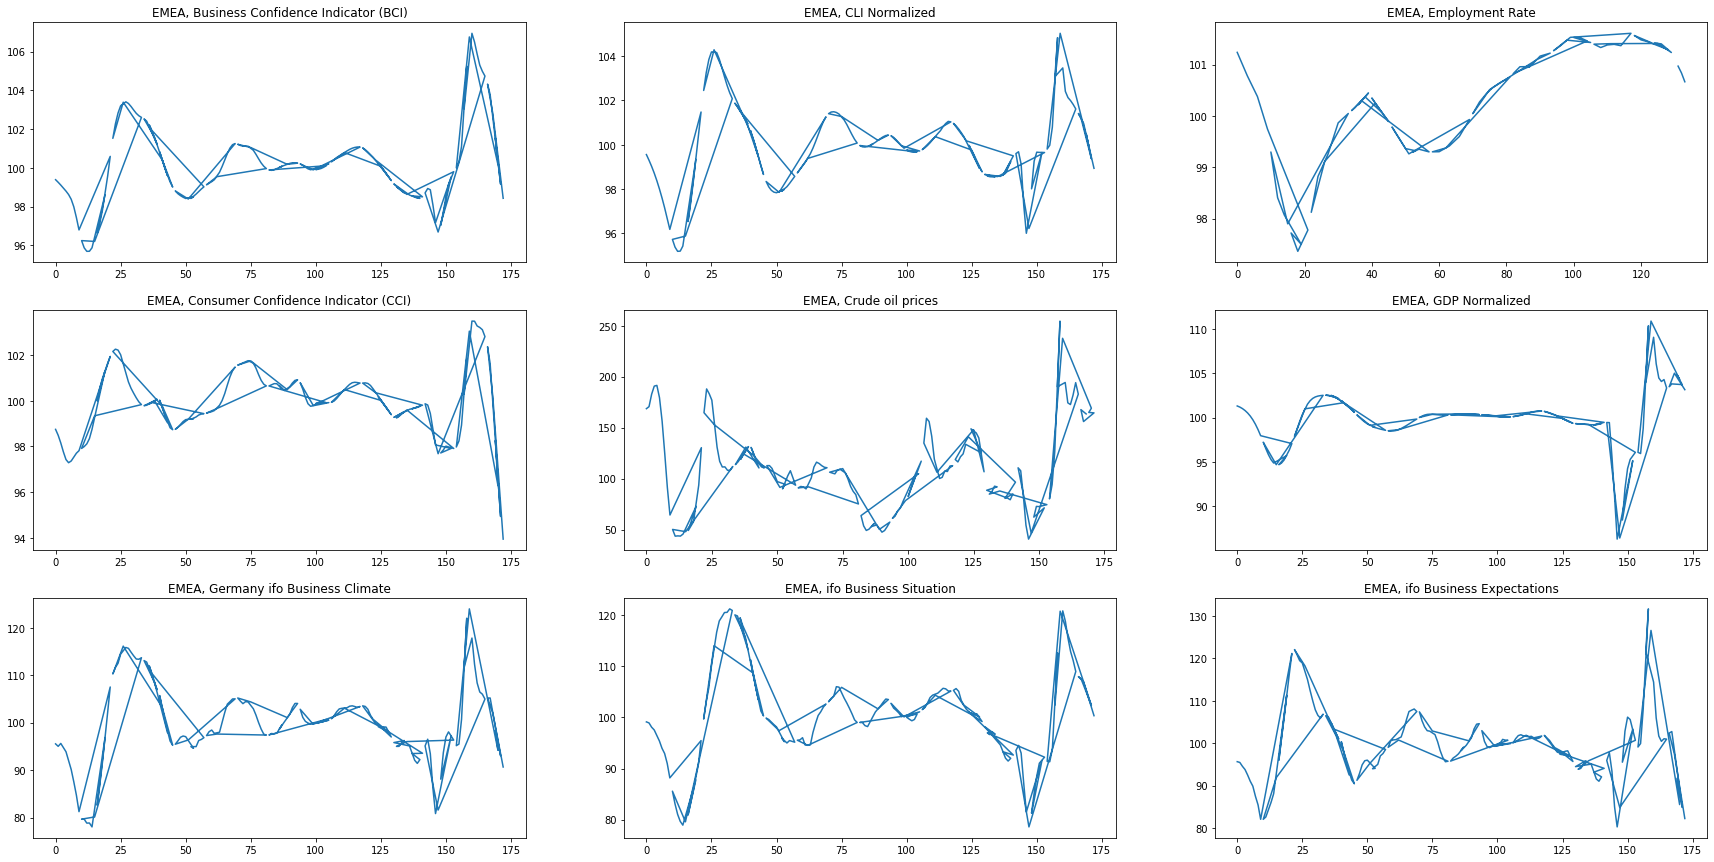

In [98]:
#fig.tight_layout(pad=10.0)
fig, ax = plt.subplots(3,3, figsize=(30,15))

ax[0,0].plot(df_Sheet3['EMEA, Business Confidence Indicator (BCI)'])
ax[0,0].set(title='EMEA, Business Confidence Indicator (BCI)')

ax[0,1].plot(df_Sheet3['EMEA, CLI Normalized'])
ax[0,1].set(title='EMEA, CLI Normalized')

ax[1,0].plot(df_Sheet3['EMEA, Consumer Confidence Indicator (CCI)'])
ax[1,0].set(title='EMEA, Consumer Confidence Indicator (CCI)')

ax[1,1].plot(df_Sheet3['EMEA, Crude oil prices'])
ax[1,1].set(title='EMEA, Crude oil prices')

ax[0,2].plot(df_Sheet3['EMEA, Employment Rate'])
ax[0,2].set(title='EMEA, Employment Rate')

ax[1,2].plot(df_Sheet3['EMEA, GDP Normalized'])
ax[1,2].set(title='EMEA, GDP Normalized')

ax[2,0].plot(df_Sheet3['EMEA, Germany ifo Business Climate'])
ax[2,0].set(title='EMEA, Germany ifo Business Climate')

ax[2,1].plot(df_Sheet3['EMEA, ifo Business Situation'])
ax[2,1].set(title='EMEA, ifo Business Situation')

ax[2,2].plot(df_Sheet3['EMEA, ifo Business Expectations'])
ax[2,2].set(title='EMEA, ifo Business Expectations')


In [99]:
df_SheetGB = df_Sheet3.groupby('period')['TARGET VARIABLE'].sum().reset_index()

In [100]:
df_SheetGB

,period,TARGET VARIABLE
0,2008-03-01,56.470288
1,2008-04-01,58.276205
2,2008-05-01,56.868989
3,2008-06-01,56.320007
4,2008-07-01,52.344385
...,...,...
168,2022-03-01,59.446688
169,2022-04-01,56.667345
170,2022-05-01,58.218333
171,2022-06-01,57.102472


In [101]:
df_SheetGB = df_SheetGB.set_index('period')
df_SheetGB.index

DatetimeIndex(['2008-03-01', '2008-04-01', '2008-05-01', '2008-06-01',
               '2008-07-01', '2008-08-01', '2008-09-01', '2008-10-01',
               '2008-11-01', '2008-12-01',
               ...
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01',
               '2022-06-01', '2022-07-01'],
              dtype='datetime64[ns]', name='period', length=173, freq=None)

In [105]:
y = df_SheetGB['TARGET VARIABLE'].resample('A').mean()

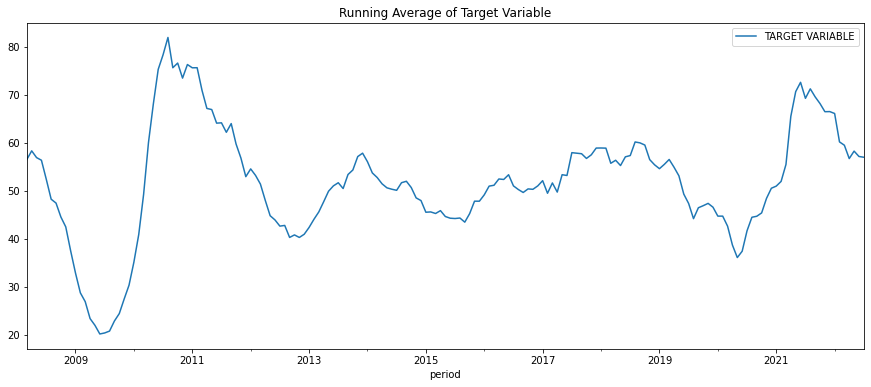

In [184]:
df_SheetGB.plot(figsize=(15, 6))
plt.title("Running Average of Target Variable")
plt.show()

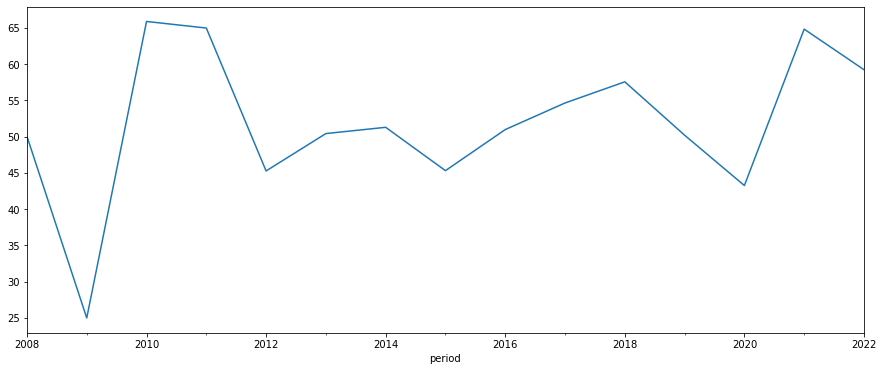

In [106]:
y.plot(figsize=(15, 6))
plt.show()

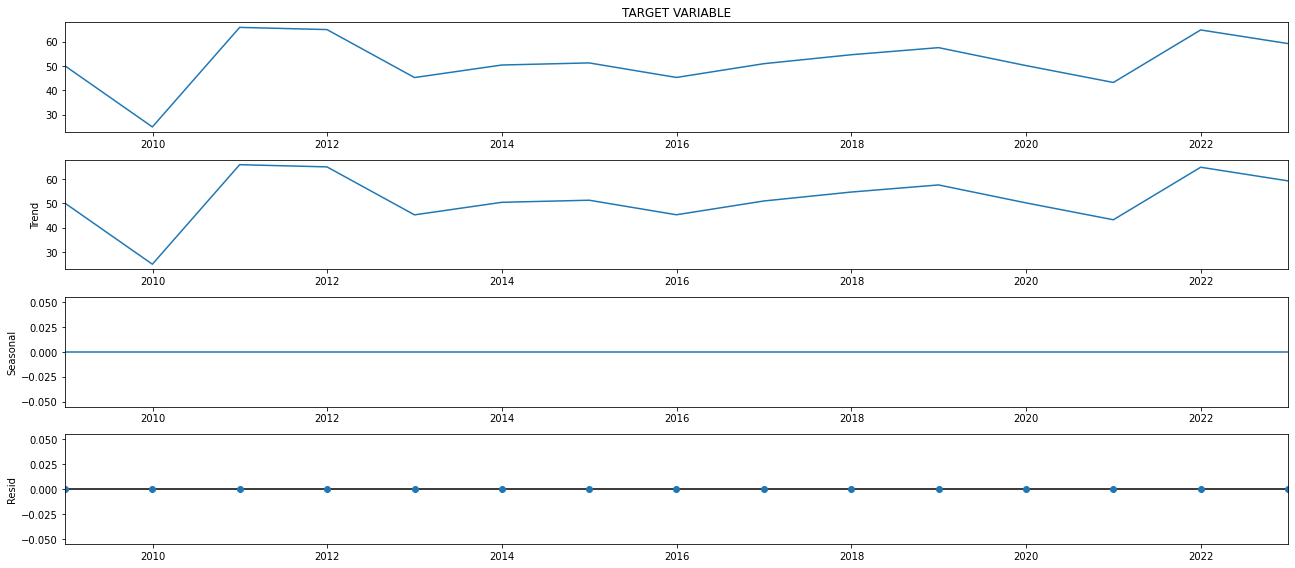

In [108]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [110]:
X = df_Sheet3.loc[:, df_Sheet3.columns != 'TARGET VARIABLE']  
y = df_Sheet3.loc[:, ['TARGET VARIABLE']]

In [127]:
print(X.shape)
print(y.shape)
print(y.info())

(173, 24)
(173, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET VARIABLE  173 non-null    float64
dtypes: float64(1)
memory usage: 2.7 KB
None


In [143]:
df_Sheet3['Year']=df_Sheet3['Year'].astype(str)
dummy = df_Sheet3.query("Year not in ['2020','2021','2022']")
dummy
X_train = dummy.loc[:, dummy.columns != 'TARGET VARIABLE']  
y_train = dummy.loc[:, ['TARGET VARIABLE']]
dummy_test = df_Sheet3.query("Year in ['2020','2021','2022']")
X_test = dummy_test.loc[:, dummy_test.columns != 'TARGET VARIABLE']  
y_test = dummy_test.loc[:, ['TARGET VARIABLE']]

In [164]:
y_test.shape

(31, 1)

In [141]:
X_train = np.asarray(dummy.loc[:, dummy.columns != 'TARGET VARIABLE']) 
y_train = np.asarray(dummy.loc[:, ['TARGET VARIABLE']])
dummy_test = df_Sheet3.query("Year in ['2020','2021','2022']")
X_test = np.asarray(dummy_test.loc[:, dummy_test.columns != 'TARGET VARIABLE'])  
y_test = np.asarray(dummy_test.loc[:, ['TARGET VARIABLE']])

In [147]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label='TARGET VARIABLE', path=save_path).fit(dummy)

INFO:autogluon.tabular.learner.default_learner:Beginning AutoGluon training ...
INFO:autogluon.tabular.learner.default_learner:AutoGluon will save models to "agModels-predictClass/"
INFO:autogluon.tabular.learner.default_learner:AutoGluon Version:  0.5.2
INFO:autogluon.tabular.learner.default_learner:Python Version:     3.7.15
INFO:autogluon.tabular.learner.default_learner:Operating System:   Linux
INFO:autogluon.tabular.learner.default_learner:Train Data Rows:    142
INFO:autogluon.tabular.learner.default_learner:Train Data Columns: 24
INFO:autogluon.tabular.learner.default_learner:Label Column: TARGET VARIABLE
INFO:autogluon.tabular.learner.default_learner:Preprocessing data ...
Level 25:autogluon.core.utils.utils:AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
INFO:autogluon.core.utils.utils:	Label info (max, min, mean, stddev): (81.893650886328, 20.1278242588241, 50.96581, 11.77897)
Level 25:a

[1000]	valid_set's rmse: 2.51259
[2000]	valid_set's rmse: 2.31315
[3000]	valid_set's rmse: 2.27192
[4000]	valid_set's rmse: 2.25421
[5000]	valid_set's rmse: 2.24763
[6000]	valid_set's rmse: 2.24071
[7000]	valid_set's rmse: 2.23712
[8000]	valid_set's rmse: 2.23793
[9000]	valid_set's rmse: 2.23694
[10000]	valid_set's rmse: 2.23645


INFO:autogluon.core.trainer.abstract_trainer:	-2.2363	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	1.95s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.02s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitting model: LightGBM ...


[1000]	valid_set's rmse: 2.64763
[2000]	valid_set's rmse: 2.56786


INFO:autogluon.core.trainer.abstract_trainer:	-2.5663	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.81s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.01s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitting model: RandomForestMSE ...
INFO:autogluon.core.trainer.abstract_trainer:	-2.5386	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.75s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.11s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitting model: CatBoost ...
INFO:autogluon.core.trainer.abstract_trainer:	-1.8169	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	6.38s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.01s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitting model: ExtraTreesMSE ...
INFO:autogluon.c

[1000]	valid_set's rmse: 2.17355
[2000]	valid_set's rmse: 2.16802
[3000]	valid_set's rmse: 2.16758
[4000]	valid_set's rmse: 2.16752
[5000]	valid_set's rmse: 2.16752
[6000]	valid_set's rmse: 2.16752
[7000]	valid_set's rmse: 2.16752
[8000]	valid_set's rmse: 2.16752
[9000]	valid_set's rmse: 2.16752
[10000]	valid_set's rmse: 2.16752


INFO:autogluon.core.trainer.abstract_trainer:	-2.1675	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	6.83s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.04s	 = Validation runtime
INFO:autogluon.core.trainer.abstract_trainer:Fitting model: WeightedEnsemble_L2 ...
INFO:autogluon.core.trainer.abstract_trainer:	-1.5955	 = Validation score   (-root_mean_squared_error)
INFO:autogluon.core.trainer.abstract_trainer:	0.39s	 = Training   runtime
INFO:autogluon.core.trainer.abstract_trainer:	0.0s	 = Validation runtime
INFO:autogluon.tabular.learner.default_learner:AutoGluon training complete, total runtime = 24.43s ... Best model: "WeightedEnsemble_L2"
INFO:autogluon.tabular.predictor.predictor:TabularPredictor saved. To load, use: predictor = TabularPredictor.load("agModels-predictClass/")


In [149]:
#predictor = TabularPredictor.load(save_path)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(X_test)
print("Predictions:  \n", y_pred)
#perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)

Predictions:  
 153    46.704128
151    43.862137
150    41.681480
149    39.719978
148    36.899361
152    44.354454
146    36.353165
145    37.860138
144    42.948059
143    50.602066
142    50.500385
147    35.197853
165    65.232063
164    65.665085
163    65.799393
162    67.874359
161    70.102501
160    71.150475
157    66.731506
158    69.233711
156    53.659752
155    47.036819
154    46.853996
159    72.186043
170    59.337143
169    59.227978
171    56.324158
167    62.349182
166    62.851566
168    61.778900
172    54.862854
Name: TARGET VARIABLE, dtype: float32


In [154]:
performance = predictor.evaluate(dummy_test)

INFO:autogluon.tabular.learner.abstract_learner:Evaluation: root_mean_squared_error on test data: -2.8742850330093987
INFO:autogluon.tabular.learner.abstract_learner:	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
INFO:autogluon.tabular.learner.abstract_learner:Evaluations on test data:
INFO:autogluon.tabular.learner.abstract_learner:{
    "root_mean_squared_error": -2.8742850330093987,
    "mean_squared_error": -8.26151445098184,
    "mean_absolute_error": -2.3883848283448477,
    "r2": 0.9333911764012077,
    "pearsonr": 0.9719619586150725,
    "median_absolute_error": -2.0799856032577466
}


In [155]:
predictor.leaderboard(dummy_test, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-2.874285,-1.595549,0.729549,0.201923,18.799400,0.006088,0.000947,0.392609,2,True,12
1,NeuralNetTorch,-5.192005,-2.134615,0.016872,0.013849,2.107186,0.016872,0.013849,2.107186,1,True,10
2,NeuralNetFastAI,-5.477461,-2.269787,0.035631,0.018083,1.128981,0.035631,0.018083,1.128981,1,True,8
3,LightGBMXT,-6.892823,-2.236300,0.151015,0.020522,1.950798,0.151015,0.020522,1.950798,1,True,3
4,LightGBM,-7.180554,-2.566255,0.127691,0.009724,0.808595,0.127691,0.009724,0.808595,1,True,4
5,CatBoost,-8.879361,-1.816924,0.011921,0.005295,6.377122,0.011921,0.005295,6.377122,1,True,6
6,ExtraTreesMSE,-8.904165,-2.109429,0.125774,0.105192,0.637747,0.125774,0.105192,0.637747,1,True,7
7,LightGBMLarge,-9.041491,-2.167518,0.399362,0.037751,6.828007,0.399362,0.037751,6.828007,1,True,11
8,RandomForestMSE,-9.659464,-2.538594,0.114125,0.107363,0.746007,0.114125,0.107363,0.746007,1,True,5
9,XGBoost,-10.567759,-2.474945,0.009251,0.007967,0.615102,0.009251,0.007967,0.615102,1,True,9


In [150]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

8.26151445098184
2.8742850330093987


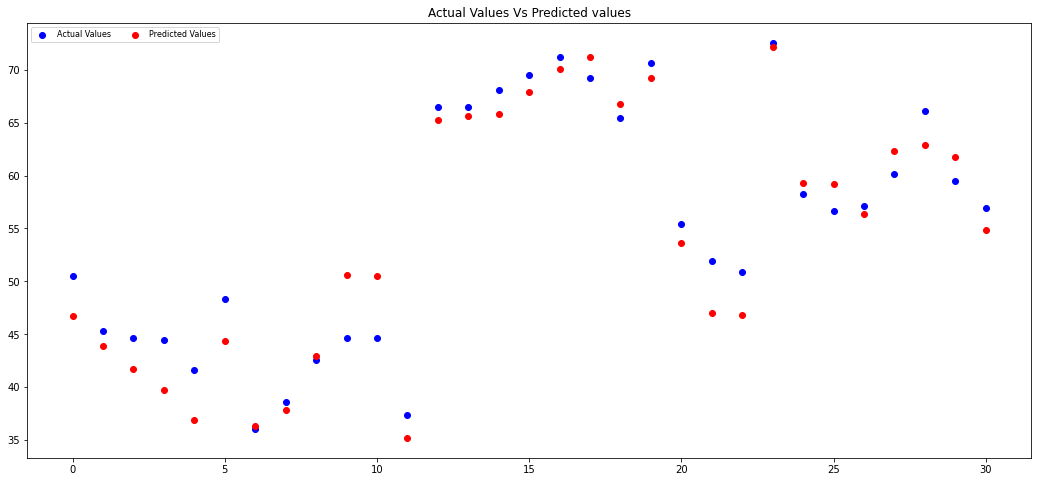

In [183]:
def plotGraph(y_test2,y_pred2,regressorName):
    if max(y_test2) >= max(y_pred2):
        my_range = int(max(y_test2))
    else:
        my_range = int(max(y_pred2))
    fig, ax=plt.subplots()

    x=plt.scatter(range(len(y_test2)), y_test2, color='blue')
    y=plt.scatter(range(len(y_pred2)), y_pred2, color='red')
    plt.title(regressorName)
    plt.legend((x, y),
           ('Actual Values', 'Predicted Values'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)

    plt.show()
    return


#y_test = range(10)
#y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test['TARGET VARIABLE'].astype(float), y_pred, "Actual Values Vs Predicted values")

In [174]:
y_pred

153    46.704128
151    43.862137
150    41.681480
149    39.719978
148    36.899361
152    44.354454
146    36.353165
145    37.860138
144    42.948059
143    50.602066
142    50.500385
147    35.197853
165    65.232063
164    65.665085
163    65.799393
162    67.874359
161    70.102501
160    71.150475
157    66.731506
158    69.233711
156    53.659752
155    47.036819
154    46.853996
159    72.186043
170    59.337143
169    59.227978
171    56.324158
167    62.349182
166    62.851566
168    61.778900
172    54.862854
Name: TARGET VARIABLE, dtype: float32

In [ ]:
df_SheetGB = df_SheetGB.set_index('Year')
df_SheetGB.index

In [ ]:
y=df_Sheet3[df_Sheet3['Year']==2008]
plt.plot(df_Sheet3['Year'],df_Sheet3['TARGET VARIABLE'])
plt.show()

In [ ]:
plt.plot(df['EMEA, VDMA Construction'])

In [ ]:
plt.plot(df['EMEA, VDMA Machine Building'],df['Month'])

In [ ]:
plt.plot(df['EMEA, VDMA Material Handling'])

In [ ]:
plt.plot(df['EMEA, VDMA Oil Hydraulic'])

In [ ]:
plt.plot(df['EMEA, VDMA Oil Hydraulic'])

In [ ]:
df.columns

In [ ]:
for i in df:
    plt.plot(df[i])
    print(i)

In [ ]:
# time series plot for multiple columns
sns.lineplot(x="Year", y="EMEA, VDMA Agriculture", data=df)
sns.lineplot(x="Year", y="EMEA, VDMA Construction", data=df)
sns.lineplot(x="Year", y="EMEA, VDMA Machine Building", data=df)
sns.lineplot(x="Year", y="EMEA, VDMA Material Handling", data=df)
sns.lineplot(x="Year", y="EMEA, VDMA Oil Hydraulic", data=df)

# set label
plt.ylabel("Units Returned Unites Sold")

plt.show()

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Daily closing prices", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, ticker in enumerate(Year):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)

    # filter df and plot ticker on the new subplot axis
    df[df["Year"] == ticker].plot(ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")


In [ ]:
df.columns

In [ ]:
#plt.figure(figsize=(25, 5))
fig.tight_layout(pad=10.0)
fig, ax = plt.subplots(3,3, figsize=(30,15))

ax[0,0].plot(df['EMEA, Business Confidence Indicator (BCI)'])
ax[0,0].set(title='EMEA, Business Confidence Indicator (BCI)')

ax[0,1].plot(df['EMEA, CLI Normalized'])
ax[0,1].set(title='EMEA, CLI Normalized')

ax[1,0].plot(df['EMEA, Consumer Confidence Indicator (CCI)'])
ax[1,0].set(title='EMEA, Consumer Confidence Indicator (CCI)')

ax[1,1].plot(df['EMEA, Crude oil prices'])
ax[1,1].set(title='EMEA, Crude oil prices')

ax[0,2].plot(df['EMEA, Employment Rate'])
ax[0,2].set(title='EMEA, Employment Rate')

ax[1,2].plot(df['EMEA, GDP Normalized'])
ax[1,2].set(title='EMEA, GDP Normalized')

ax[2,0].plot(df['EMEA, Germany ifo Business Climate'])
ax[2,0].set(title='EMEA, Germany ifo Business Climate')

ax[2,1].plot(df['EMEA, ifo Business Situation'])
ax[2,1].set(title='EMEA, ifo Business Situation')

ax[2,2].plot(df['EMEA, ifo Business Expectations'])
ax[2,2].set(title='EMEA, ifo Business Expectations')


In [ ]:
#plt.figure(figsize=(100, 5))
fig, ax = plt.subplots(3,3, figsize=(50,25 ))
ax[0,0].plot(df['EMEA, ifo Business Situation'])
ax[0,0].set(title='EMEA, ifo Business Situation')

ax[0,1].plot(df['EMEA, CLI Normalized'])
ax[0,1].set(title='EMEA, CLI Normalized')

ax[1,0].plot(df['EMEA, Consumer Confidence Indicator (CCI)'])
ax[1,0].set(title='EMEA, Consumer Confidence Indicator (CCI)')

ax[1,1].plot(df['EMEA, Crude oil prices'])
ax[1,1].set(title='EMEA, Crude oil prices')

ax[0,2].plot(df['EMEA, Employment Rate'])
ax[0,2].set(title='EMEA, Employment Rate')

ax[1,2].plot(df['EMEA, GDP Normalized'])
ax[1,2].set(title='EMEA, GDP Normalized')

ax[2,0].plot(df['EMEA, Germany ifo Business Climate'])
ax[2,0].set(title='EMEA, Germany ifo Business Climate')

ax[2,1].plot(df['EMEA, Germany ifo Business Climate'])
ax[2,1].set(title='EMEA, Germany ifo Business Climate')

ax[2,2].plot(df['EMEA, ifo Business Expectations'])
ax[2,2].set(title='EMEA, ifo Business Expectations')

In [ ]:
df.hist(bins=40,figsize=(25,15),color='cadetblue');

In [ ]:
df.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

In [ ]:
label = 'TARGET VARIABLE'
print("Summary of target variable: \n", df[label].describe())

In [ ]:
save_path = 'agModels-predictClass'  # specifies folder to store trained models
predictor = TabularPredictor(label=label, path=save_path).fit(df)

In [ ]:
df  = df._get_numeric_data()
plt.figure(figsize=(14,8))
hm = sns.heatmap(df.corr(), annot = True,cmap='BrBG')

plt.show()